In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/hr-analytics/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.shape

(14999, 10)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


# EDA & Data analysic

In [5]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

<AxesSubplot:xlabel='left', ylabel='count'>

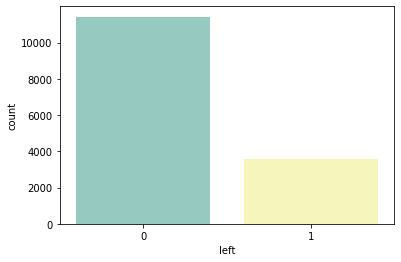

In [8]:
sns.countplot(df['left'],palette='Set3')

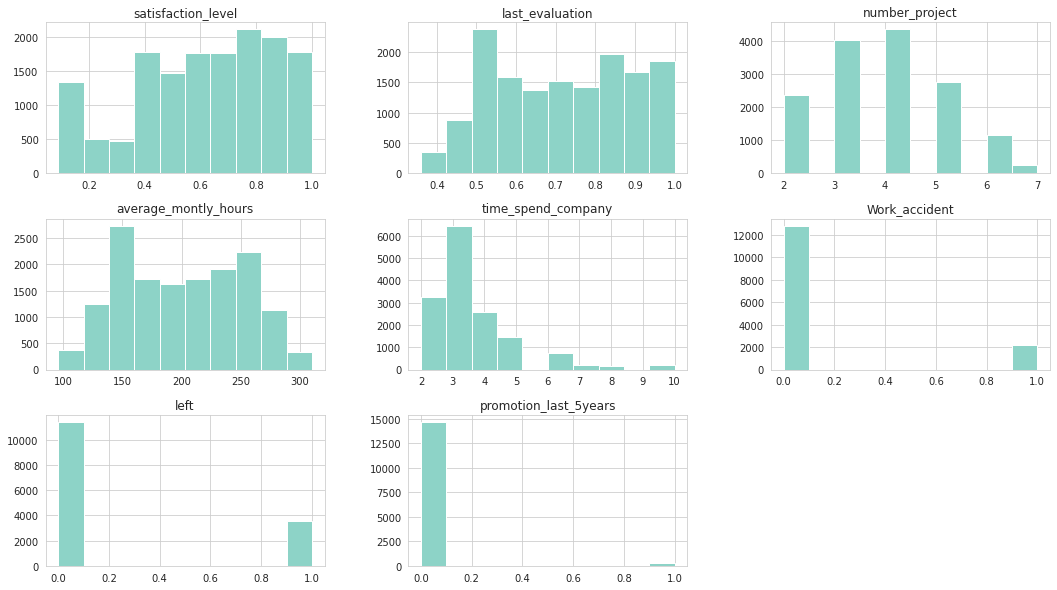

In [9]:
sns.set_style('whitegrid')
sns.set_palette('Set3')
df.hist(figsize=(18,10));

<AxesSubplot:xlabel='salary', ylabel='count'>

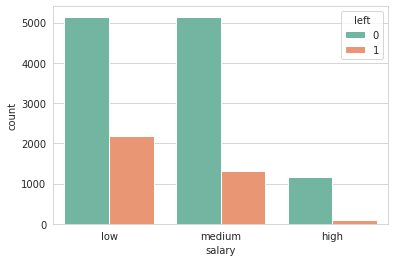

In [10]:
sns.countplot(df['salary'],hue=df['left'],palette='Set2')

<AxesSubplot:xlabel='Department', ylabel='count'>

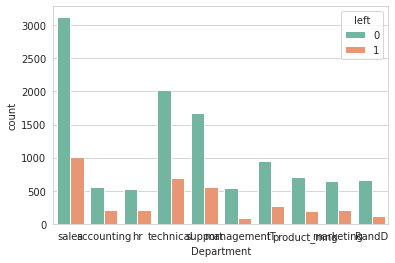

In [11]:
sns.countplot(df['Department'],hue=df['left'],palette='Set2')

<AxesSubplot:xlabel='number_project', ylabel='count'>

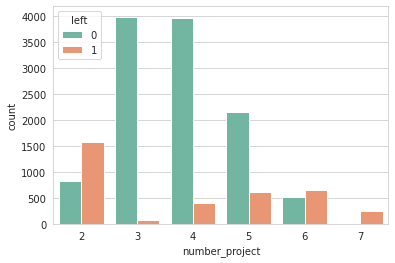

In [12]:
sns.countplot(df['number_project'],hue=df['left'],palette='Set2')

Text(0, 0.5, 'Frequency')

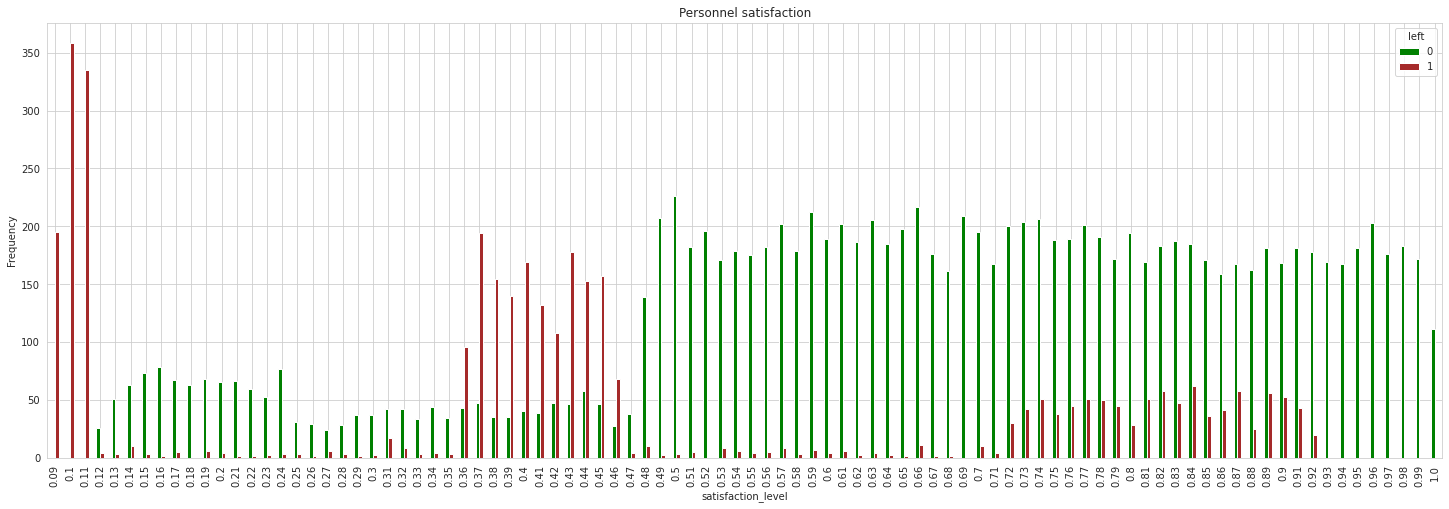

In [13]:
pd.crosstab(df['satisfaction_level'],df['left']).plot(kind="bar",figsize=(25,8),color=['green','brown' ])
plt.title('Personnel satisfaction')
plt.xlabel('satisfaction_level')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

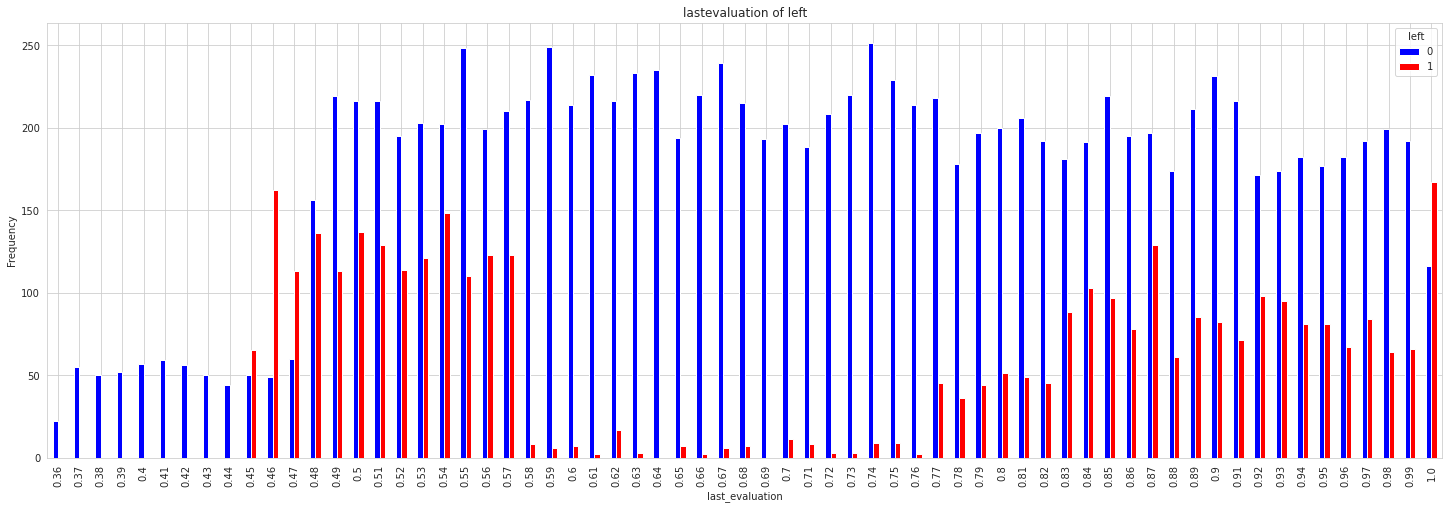

In [14]:
pd.crosstab(df['last_evaluation'],df['left']).plot(kind="bar",figsize=(25,8),color=['blue','red' ])
plt.title('lastevaluation of left')
plt.xlabel('last_evaluation')
plt.ylabel('Frequency')

In [15]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [16]:
df['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [17]:
table = df.pivot_table("satisfaction_level", index="Department", columns="salary")
table

salary,high,low,medium
Department,,,
IT,0.638193,0.610099,0.624187
RandD,0.586667,0.623929,0.620349
accounting,0.614054,0.574162,0.583642
hr,0.673111,0.608657,0.580306
management,0.653333,0.610722,0.597867
marketing,0.605250,0.602910,0.638218
product_mng,0.614118,0.620909,0.619112
sales,0.648959,0.600838,0.625327
support,0.655035,0.591710,0.645149


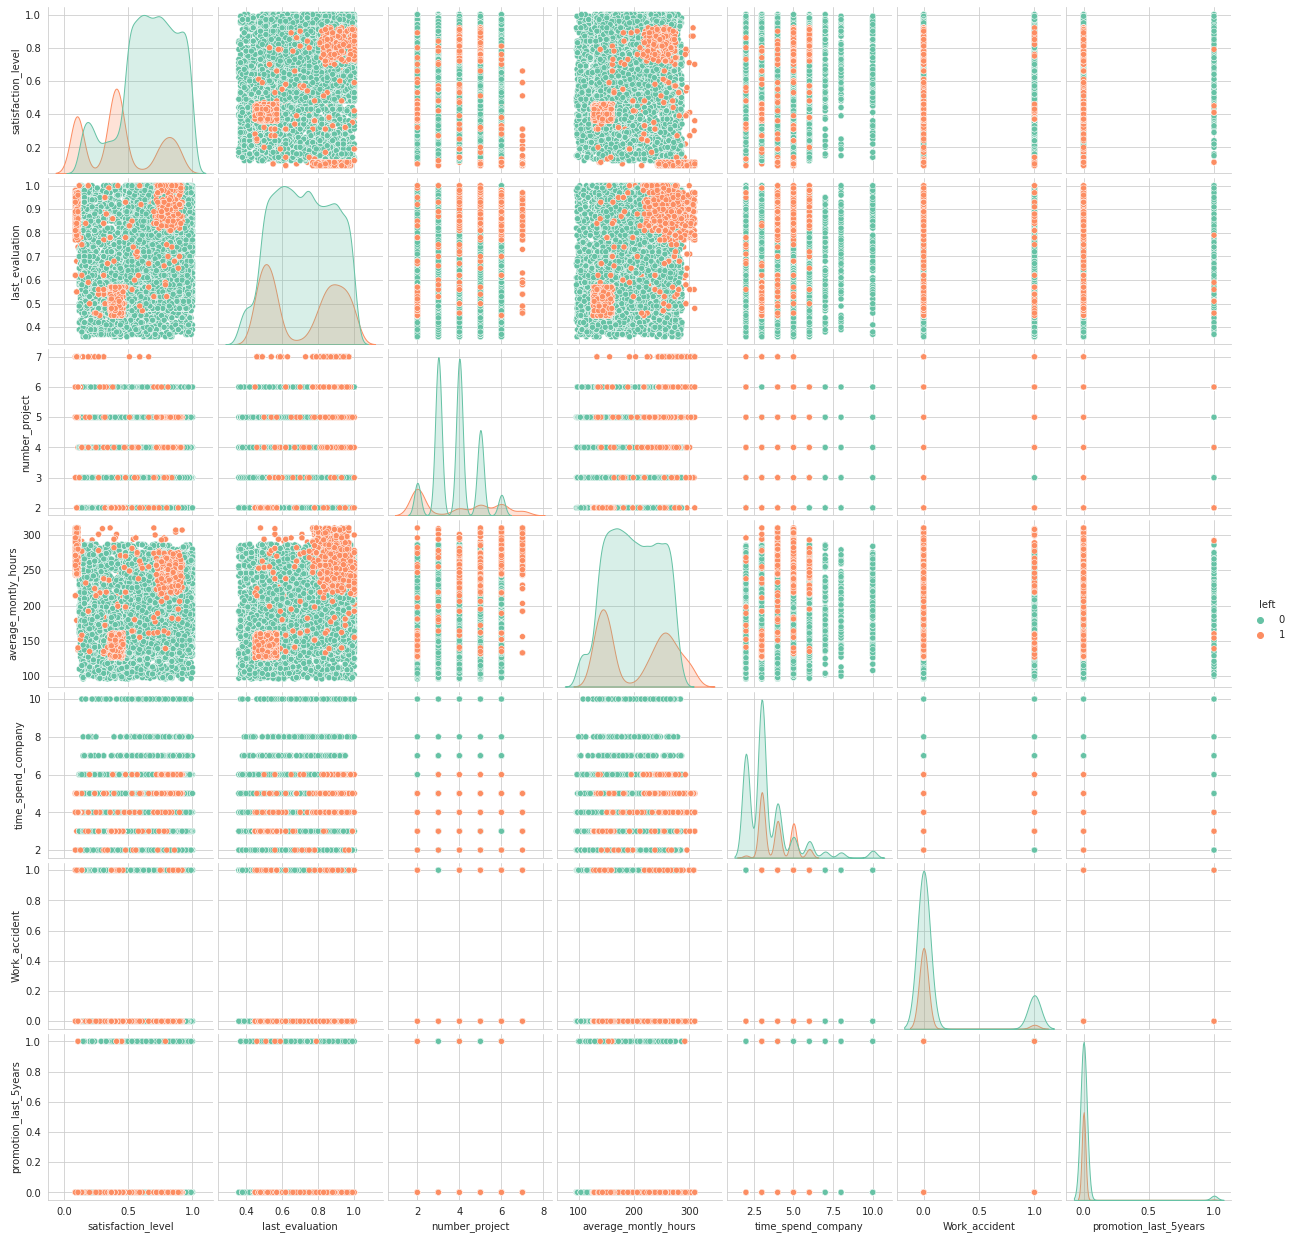

In [18]:
sns.pairplot(df,hue= 'left',palette='Set2')

<AxesSubplot:>

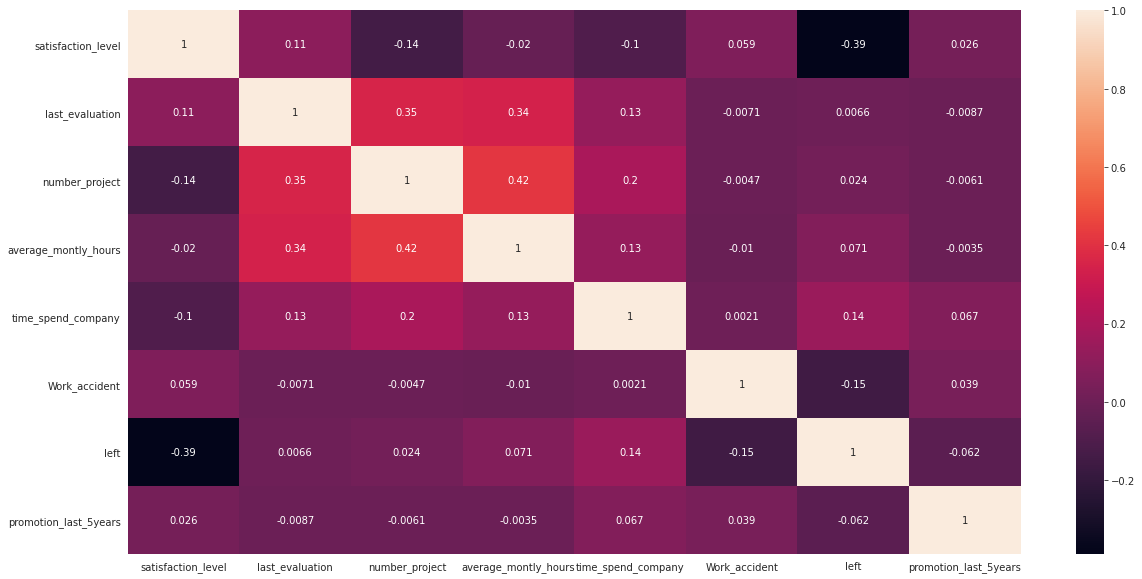

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

# missing value

In [20]:
df.isnull().mean()

satisfaction_level       0.0
last_evaluation          0.0
number_project           0.0
average_montly_hours     0.0
time_spend_company       0.0
Work_accident            0.0
left                     0.0
promotion_last_5years    0.0
Department               0.0
salary                   0.0
dtype: float64

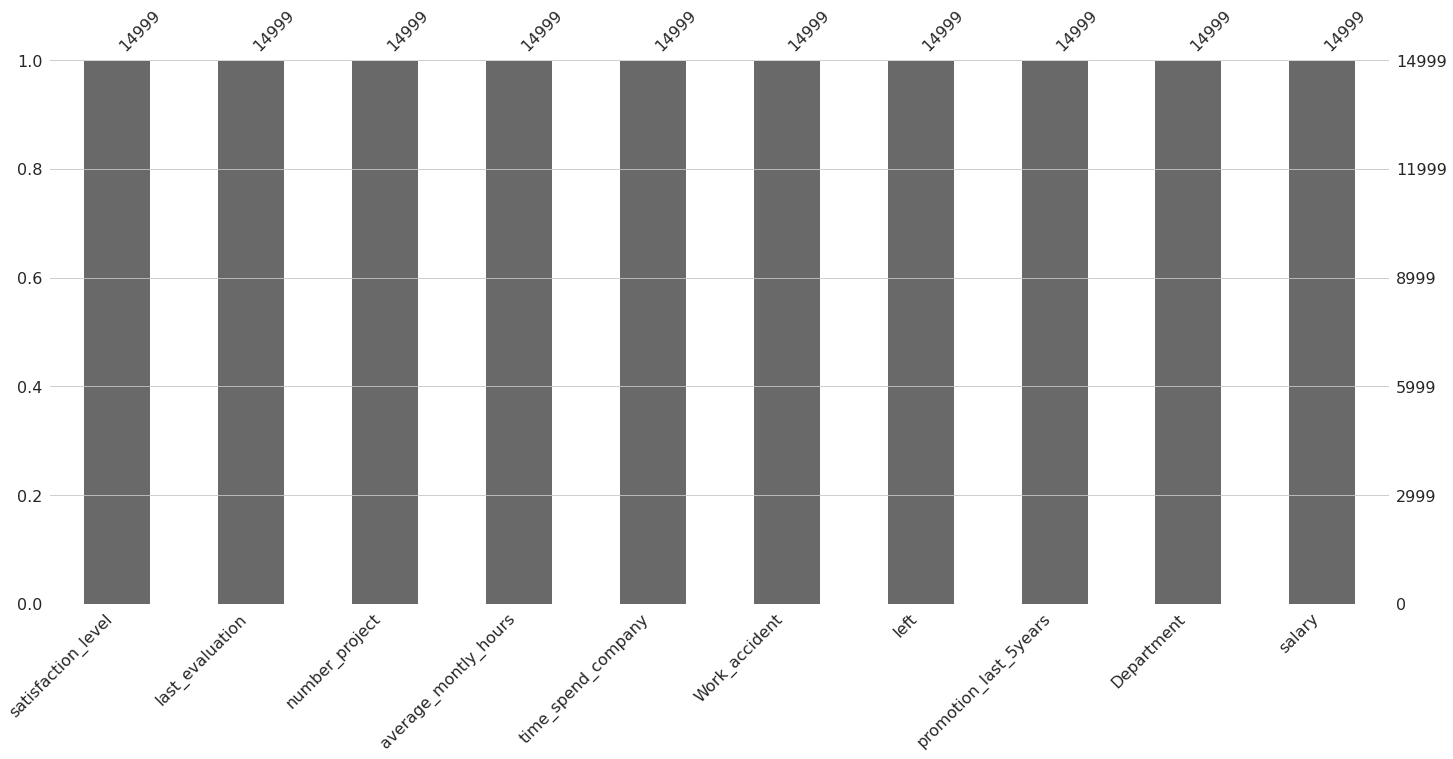

In [21]:
## null count analysis
import missingno as msno
p=msno.bar(df)

# Outlier detection

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [23]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2,color='skyblue')

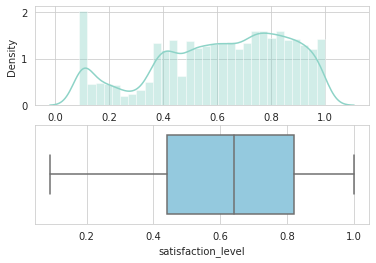

In [24]:
plot(df,"satisfaction_level")

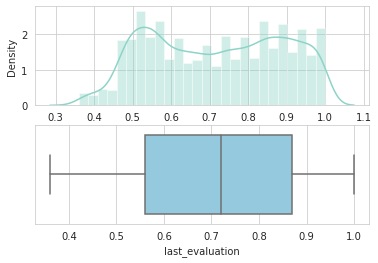

In [25]:
plot(df,"last_evaluation")

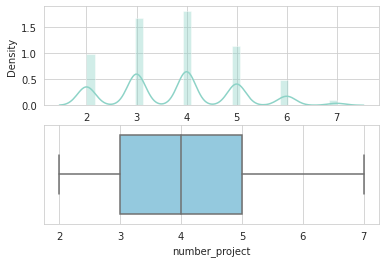

In [26]:
plot(df,"number_project")

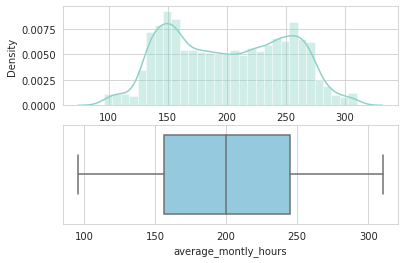

In [27]:
plot(df,"average_montly_hours")

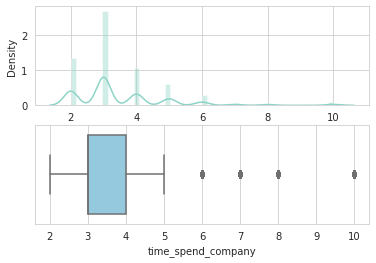

In [28]:
plot(df,"time_spend_company")

# Duplicate

In [29]:
print('Before drop duplicate:', df.shape)



df= df.drop_duplicates()
print('After drop duplicate:', df.shape)


Before drop duplicate: (14999, 10)
After drop duplicate: (11991, 10)


# Data encoding

In [30]:
from sklearn.preprocessing import LabelEncoder 


le=LabelEncoder()
df['salary']=le.fit_transform(df['salary']) 


In [31]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,1,0,0


# Train Test

In [32]:
x= df.drop("left", axis=1)
y = df.left

In [33]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=.80,random_state=22)
print(xtrain.shape)
print(xtest.shape)

(9592, 17)
(2399, 17)


## Data scailng

In [34]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
xtrain = scale.fit_transform(xtrain, ytrain)
xtest = scale.transform(xtest)

## balancing

In [35]:
from imblearn.over_sampling import SMOTE  
 


smt = SMOTE()
xtrain, ytrain = smt.fit_resample(xtrain, ytrain)
np.bincount(ytrain)

array([8024, 8024])

## the model

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
import xgboost as xgb 
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection


Text(0.5, 1.0, 'Accuracy Scores for Values of k of k-Nearest-Neighbors')

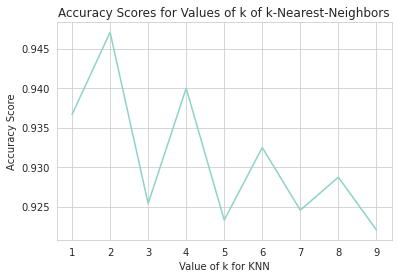

In [37]:
# k ploting
k_range = list(range(1,10))
score=[]

for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain,ytrain)
    ypred = knn.predict(xtest)
    score.append(accuracy_score(ytest, ypred))
    

plt.plot(k_range,score)


plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')

plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors') 

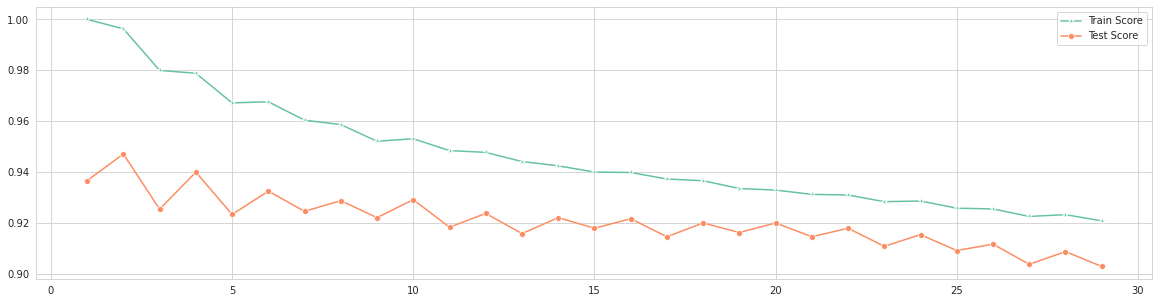

In [38]:
sns.set_palette('Set2')

test_scores = []
train_scores = []

for i in range(1,30):

    knn = KNeighborsClassifier(i)
    knn.fit(xtrain,ytrain)
    
    train_scores.append(knn.score(xtrain,ytrain))
    test_scores.append(knn.score(xtest,ytest))

plt.figure(figsize=(20,5))
p = sns.lineplot(range(1,30),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,30),test_scores,marker='o',label='Test Score')

In [39]:
#LogisticRegression
lr_c=LogisticRegression(C=0.01, penalty= 'l2',random_state=22)
lr_c.fit(xtrain,ytrain)
lr_pred=lr_c.predict(xtest)
lr_cm=confusion_matrix(ytest,lr_pred)
lr_ac=accuracy_score(ytest, lr_pred)

#MLP
MLP = MLPClassifier(activation='relu', hidden_layer_sizes= (20, 30), learning_rate_init= 0.001, max_iter=200, solver ='adam',random_state=22)
MLP.fit(xtrain,ytrain)
MLP_pred=MLP.predict(xtest)
MLP_cm=confusion_matrix(ytest,MLP_pred)
MLP_ac=accuracy_score(ytest, MLP_pred)

#Bayes
gaussian=GaussianNB()
gaussian.fit(xtrain,ytrain)
bayes_pred=gaussian.predict(xtest)
bayes_cm=confusion_matrix(ytest,bayes_pred)
bayes_ac=accuracy_score(bayes_pred,ytest)

#SVM  
svc_r=SVC(C= 100, kernel= 'poly',degree=2,random_state=22)
svc_r.fit(xtrain,ytrain)
svr_pred=svc_r.predict(xtest)
svr_cm=confusion_matrix(ytest,svr_pred)
svr_ac=accuracy_score(ytest, svr_pred)

#RandomForest
rdf_c=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=22)
rdf_c.fit(xtrain,ytrain)
rdf_pred=rdf_c.predict(xtest)
rdf_cm=confusion_matrix(ytest,rdf_pred)
rdf_ac=accuracy_score(rdf_pred,ytest)

# DecisionTree Classifier
dtree_c=DecisionTreeClassifier(criterion= 'gini', max_depth= 5, min_samples_leaf= 2, min_samples_split= 3, splitter= 'best',random_state=22)
dtree_c.fit(xtrain,ytrain)
dtree_pred=dtree_c.predict(xtest)
dtree_cm=confusion_matrix(ytest,dtree_pred)
dtree_ac=accuracy_score(dtree_pred,ytest)
#KNN
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(xtrain,ytrain)
knn_pred=knn.predict(xtest)
knn_cm=confusion_matrix(ytest,knn_pred)
knn_ac=accuracy_score(knn_pred,ytest)

<AxesSubplot:title={'center':'kNN_cm'}>

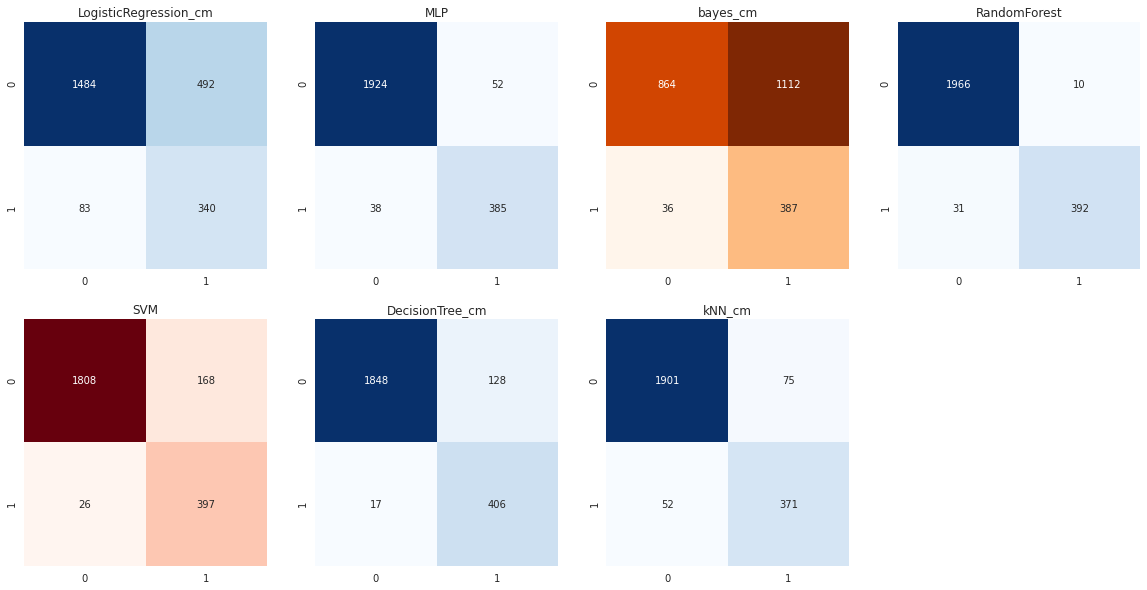

In [40]:
plt.figure(figsize=(20,10))

plt.subplot(2,4,1)
plt.title("LogisticRegression_cm")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,4,2)
plt.title("MLP")
sns.heatmap(MLP_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,4,3)
plt.title("bayes_cm")
sns.heatmap(bayes_cm,annot=True,cmap="Oranges",fmt="d",cbar=False)

plt.subplot(2,4,4)
plt.title("RandomForest")
sns.heatmap(rdf_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,4,5)
plt.title("SVM")
sns.heatmap(svr_cm,annot=True,cmap="Reds",fmt="d",cbar=False)

plt.subplot(2,4,6)
plt.title("DecisionTree_cm")
sns.heatmap(dtree_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,4,7)
plt.title("kNN_cm")
sns.heatmap(knn_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [41]:
print('LogisticRegression_accuracy:\t',lr_ac)
print('MLP_accuracy:\t\t\t',MLP_ac)
print('RandomForest_accuracy:\t\t',rdf_ac)
print('DecisionTree_accuracy:\t\t',dtree_ac)
print('KNN_accuracy:\t\t\t',knn_ac)
print('SVM_accuracy:\t\t\t',svr_ac)
print('Bayes_accuracy:\t\t\t',bayes_ac)

LogisticRegression_accuracy:	 0.7603167986661109
MLP_accuracy:			 0.9624843684868696
RandomForest_accuracy:		 0.9829095456440183
DecisionTree_accuracy:		 0.9395581492288454
KNN_accuracy:			 0.9470612755314715
SVM_accuracy:			 0.9191329720716965
Bayes_accuracy:			 0.5214672780325136


In [42]:
models = pd.DataFrame({'Model': ['LogisticRegression','MLP','Bayes','SVM',
                                      'RandomForest','DecisionTree_Classifier','KNN'],'Score': [lr_ac,MLP_ac,bayes_ac,svr_ac,rdf_ac,dtree_ac,knn_ac]})

models.sort_values(by = 'Score', ascending = False).reset_index(drop=True)

,Model,Score
0,RandomForest,0.982910
1,MLP,0.962484
2,KNN,0.947061
3,DecisionTree_Classifier,0.939558
4,SVM,0.919133
5,LogisticRegression,0.760317
6,Bayes,0.521467


<AxesSubplot:xlabel='Score', ylabel='Model'>

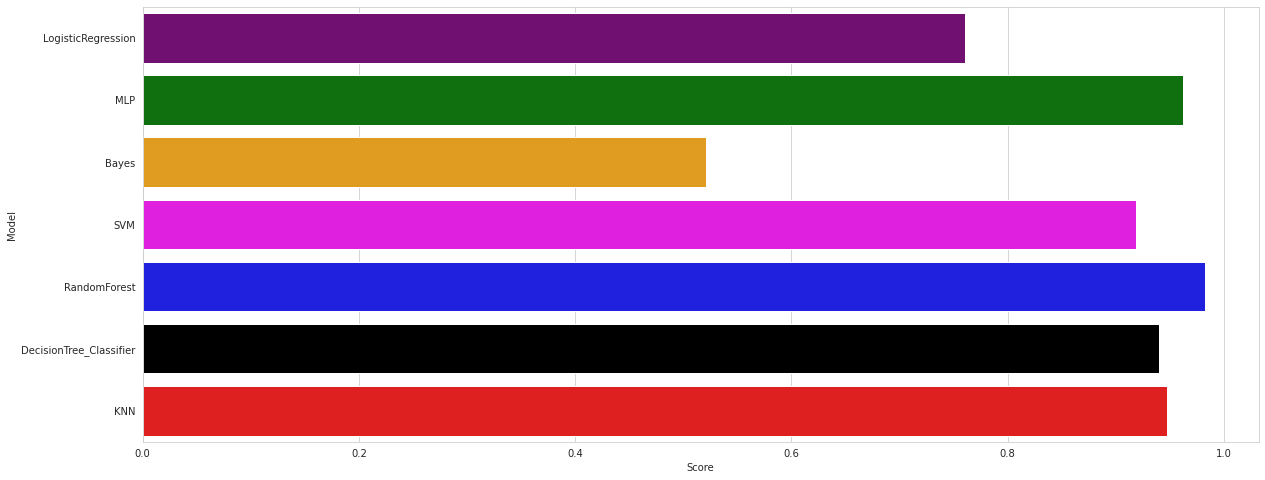

In [43]:
colors = ["purple", "green", "orange", "magenta","blue","black","red"]

sns.set_style("whitegrid")
plt.figure(figsize=(20,8))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Score'],y=models['Model'], palette=colors )


In [44]:
DT2= DecisionTreeClassifier(criterion= 'gini', max_depth= 5, min_samples_leaf= 2, min_samples_split= 3, splitter= 'best',random_state=22)

scores = cross_val_score(DT2, x , y , cv = 10, scoring = 'accuracy')
print(scores)
print(scores.mean())


[0.9825     0.98582152 0.97497915 0.97497915 0.97998332 0.97831526
 0.98165138 0.97914929 0.97998332 0.96747289]
0.9784835279399499


In [45]:
lr_c2=LogisticRegression()
scores_Lr = cross_val_score(lr_c2, x , y , cv = 10, scoring = 'accuracy')
print(scores_Lr)
print(scores_Lr.mean())

[nan nan nan nan nan nan nan nan nan nan]
nan


In [46]:
mlp2=MLPClassifier(activation='relu', hidden_layer_sizes= (20, 30), learning_rate_init= 0.001, max_iter=200, solver ='adam',random_state=22)
scores_mlp = cross_val_score(mlp2, x , y , cv = 10, scoring = 'accuracy')
print(scores_mlp)
print(scores_mlp.mean())

[0.91083333 0.88073394 0.86155129 0.91743119 0.83569641 0.8707256
 0.83903253 0.84236864 0.83736447 0.64220183]
0.8437939254934668


In [47]:
gb_2 = GaussianNB()
scores_gb =cross_val_score(gb_2, x , y , cv = 10, scoring = 'accuracy')
print(scores_gb)
print(scores_gb.mean())

[0.79833333 0.8381985  0.82485405 0.81317765 0.79566305 0.79816514
 0.81234362 0.79733111 0.79733111 0.7381151 ]
0.801351264943008


In [48]:
svc_2 = SVC(C= 100, kernel= 'poly',degree=2,random_state=22)
scores_svc = cross_val_score(svc_2,x,y,cv=10,scoring='accuracy')

print(scores_svc)
print(scores_svc.mean())

[0.83333333 0.83402836 0.83402836 0.83402836 0.83402836 0.83402836
 0.83402836 0.83402836 0.83402836 0.83402836]
0.8339588546010563


In [49]:
rdf_2 = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=22)
scores_rd = cross_val_score(rdf_2,x,y,cv=10,scoring='accuracy')

print(scores_rd)
print(scores_rd.mean())

[0.98333333 0.9883236  0.98165138 0.97998332 0.98415346 0.98331943
 0.98582152 0.98415346 0.98331943 0.97914929]
0.9833208229079788


In [50]:
knn_2 = KNeighborsClassifier(n_neighbors=2)
scores_kn = cross_val_score(knn_2,x,y,cv = 10,scoring='accuracy')

print(scores_kn)
print(scores_kn.mean())

[0.94416667 0.95246038 0.9324437  0.94245204 0.94578816 0.94829024
 0.94328607 0.94495413 0.94662219 0.9324437 ]
0.9432907283847651


In [51]:
model = ['KNN','Randomforest','DesitionTree','NeuralNetwork','SVM','LogisticRegression','NaiveBayes']
treintest = [knn_ac,rdf_ac,dtree_ac,MLP_ac,svr_ac,lr_ac,bayes_ac]
cross = [scores_kn.mean(),scores_rd.mean(),scores.mean(),scores_mlp.mean(),scores_svc.mean(),scores_Lr.mean(),scores_gb.mean()]

In [52]:
Comparison = pd.DataFrame({'Model':model,'TreinTest Accuracy':treintest,'Cross Val Accuracy':cross})
Comparison.sort_values(by='TreinTest Accuracy',ascending=False,inplace=True)

In [53]:
Comparison.reset_index(drop=True)

,Model,TreinTest Accuracy,Cross Val Accuracy
0,Randomforest,0.982910,0.983321
1,NeuralNetwork,0.962484,0.843794
2,KNN,0.947061,0.943291
3,DesitionTree,0.939558,0.978484
4,SVM,0.919133,0.833959
5,LogisticRegression,0.760317,NaN
6,NaiveBayes,0.521467,0.801351


## voting

In [54]:
kfold = model_selection.KFold(n_splits=10, random_state=22)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
model4 = xgb.XGBClassifier()
estimators.append(('xgboost', model4))
model5 = KNeighborsClassifier()
estimators.append(('Knn', model5))
model6= RandomForestClassifier()
estimators.append(('Random forest', model6))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, xtrain, ytrain, cv=kfold)
print(results.mean())

[21:07:38] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:07:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:07:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:08:00] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be